# Sobre o dataset

Os dados foram extraídos de um site oficial do governo dos Estados Unidos e podem ser visualizados neste link: https://catalog.data.gov/dataset/covid-19-outcomes-by-vaccination-status.

O dataset contém as taxas semanais de casos de COVID-19, hospitalizações e mortes entre pessoas que vivem em Chicago por estado de vacinação (vacinados, não vacinados e vacinados com reforço) e idade.

<b>Colunas:</b>

* <b>Outcome</b>: Resultado
    * <b>Cases</b>: Pessoas com um resultado positivo no teste molecular (PCR) ou de antígeno para COVID-19. Uma pessoa pode ser reinfectada com SARS-CoV-2 ao longo do tempo e, portanto, pode ser contada mais de uma vez neste conjunto de dados. Os casos são contados pela semana em que a amostra do teste foi coletada.
    * <b>Hospitalizations</b>: casos de COVID-19 que são hospitalizados devido a uma doença documentada relacionada à COVID-19 ou que são admitidos por qualquer motivo dentro de 14 dias de um teste positivo para SARS-CoV-2. As hospitalizações são contadas pela semana de admissão hospitalar.
    * <b>Deaths</b>: casos de COVID-19 que morreram de complicações de saúde relacionadas à COVID-19, conforme determinado por registros vitais ou uma investigação de saúde pública. As mortes são contadas pela semana da morte.

* <b>Week End</b>: Data final da semana
* <b>Age Group</b>: Faixa etária descrita, em anos.
* <b>Unvaccinated Rate</b>: Taxa de não vacinados. Taxa de resultado por 100.000 residentes não vacinados de Chicago na faixa etária
* <b>Vaccinated Rate</b>: Taxa de vacinados. Taxa de resultado por 100.000 residentes de Chicago totalmente vacinados, mas sem reforço, na faixa etária
* <b>Boosted Rate</b>: Taxa de resultado por 100.000 residentes de Chicago totalmente vacinados e com reforço na faixa etária
* <b>Crude Vaccinated Ratio</b>: proporção bruta vacinada. Razão da taxa de incidência bruta (taxa de não vacinados/ taxa de vacinados).
* <b>Crude Boosted Ratio</b>: proporção bruta totalmente vacinada. Razão da taxa de incidência bruta (taxa de não vacinados/ taxa de vacinados)
* <b>Age-Adjusted Unvaccinated Rate</b>: Taxa de não vacinados ajustada por idade. Taxa ajustada por idade do resultado por 100.000 residentes não vacinados de Chicago. O ajuste por idade é calculado apenas para a faixa etária “All” e está em branco para todos os outros grupos.
* <b>Age-Adjusted Vaccinated Rate</b>: Taxa de vacinados ajustada por idade. Taxa ajustada por idade do resultado por 100.000 residentes de Chicago totalmente vacinados, mas não reforçados. O ajuste por idade é calculado apenas para a faixa etária “All” e está em branco para todos os outros grupos.
* <b>Age-Adjusted Boosted Rate</b>: Taxa de reforço ajustada por idade. Taxa ajustada por idade do resultado por 100.000 residentes de Chicago totalmente vacinados e reforçados. O ajuste por idade é calculado apenas para a faixa etária “All” e está em branco para todos os outros grupos.
* <b>Age-Adjusted Vaccinated Ratio</b>: Proporção de vacinação ajustada por idade. Razão de taxa de incidência ajustada por idade (taxa de não vacinados ajustada por idade: taxa de vacinados ajustada por idade). O ajuste por idade é calculado apenas para a faixa etária “Todos” e está em branco para todos os outros grupos.
* <b>Age-Adjusted Boosted Ratio</b>: Proporção de reforço ajustada por idade. Razão de taxa de incidência ajustada por idade (taxa de não vacinados ajustada por idade: taxa de reforço ajustada por idade). O ajuste por idade é calculado apenas para a faixa etária “Todos” e está em branco para todos os outros grupos.
* <b>Population Unvaccinated</b>: População não vacinada. Número total de pessoas não vacinadas na faixa etária.
* <b>Population Vaccinated</b>: População vacinada. Número total de pessoas totalmente vacinadas na faixa etária.

# Análise

In [5]:
# importando as bibliotecas necessárias
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale
import matplotlib.dates as mdates

In [6]:
# carregando e visualizando o dataset
df = pd.read_csv('../data/COVID-19_Outcomes_by_Vaccination_Status_-_Historical.csv')
df.head()

,Outcome,Week End,Age Group,Unvaccinated Rate,Vaccinated Rate,Boosted Rate,Crude Vaccinated Ratio,Crude Boosted Ratio,Age-Adjusted Unvaccinated Rate,Age-Adjusted Vaccinated Rate,...,Age-Adjusted Vaccinated Ratio,Age-Adjusted Boosted Ratio,Population Unvaccinated,Population Vaccinated,Population Boosted,Outcome Unvaccinated,Outcome Vaccinated,Outcome Boosted,Age Group Min,Age Group Max
0,Deaths,07/09/2022,0-4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,162642,NaN,NaN,0,NaN,NaN,0,4
1,Cases,11/12/2022,0-4,82.4,5.5,NaN,15.0,NaN,NaN,NaN,...,NaN,NaN,162642,NaN,NaN,134,9.0,NaN,0,4
2,Cases,02/26/2022,0-4,54.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,162642,NaN,NaN,88,NaN,NaN,0,4
3,Hospitalizations,12/11/2021,0-4,3.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,162642,NaN,NaN,5,NaN,NaN,0,4
4,Cases,11/20/2021,0-4,104.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,162642,NaN,NaN,170,NaN,NaN,0,4


In [7]:
df['Age Group'].unique()

array(['0-4', '5-11', '80+', 'All', '50-64', '18-29', '12-17', '30-49',
       '65-79'], dtype=object)

## Pergunta de negócio 1 

Qual a evolução da taxa de hospitalização entre os não vacinados, vacinados sem reforço e vacinados com reforço ao longo do tempo?

In [8]:
# visualizando as colunas do dataset
df.columns

Index(['Outcome', 'Week End', 'Age Group', 'Unvaccinated Rate',
       'Vaccinated Rate', 'Boosted Rate', 'Crude Vaccinated Ratio',
       'Crude Boosted Ratio', 'Age-Adjusted Unvaccinated Rate',
       'Age-Adjusted Vaccinated Rate', 'Age-Adjusted Boosted Rate',
       'Age-Adjusted Vaccinated Ratio', 'Age-Adjusted Boosted Ratio',
       'Population Unvaccinated', 'Population Vaccinated',
       'Population Boosted', 'Outcome Unvaccinated', 'Outcome Vaccinated',
       'Outcome Boosted', 'Age Group Min', 'Age Group Max'],
      dtype='object')

In [9]:
# extraindo os valores únicos da coluna Outcome
df['Outcome'].unique()

array(['Deaths', 'Cases', 'Hospitalizations'], dtype=object)

In [10]:
# filtrando apenas as hospitalizacoes
df_hospitalizacoes = df[df['Outcome'] == 'Hospitalizations'].loc[:,['Outcome', 'Week End', 'Unvaccinated Rate', 'Vaccinated Rate', 'Boosted Rate']].reset_index(drop=True)
df_hospitalizacoes.head()

,Outcome,Week End,Unvaccinated Rate,Vaccinated Rate,Boosted Rate
0,Hospitalizations,12/11/2021,3.1,NaN,NaN
1,Hospitalizations,08/21/2021,34.6,15.1,NaN
2,Hospitalizations,07/23/2022,6.8,0.0,NaN
3,Hospitalizations,05/20/2023,1.2,0.0,NaN
4,Hospitalizations,03/18/2023,1.8,0.0,NaN


In [11]:
# convertendo a coluna 'Week End' para datetime
df_hospitalizacoes['Week End'] = pd.to_datetime(df_hospitalizacoes['Week End'], format='%m/%d/%Y')

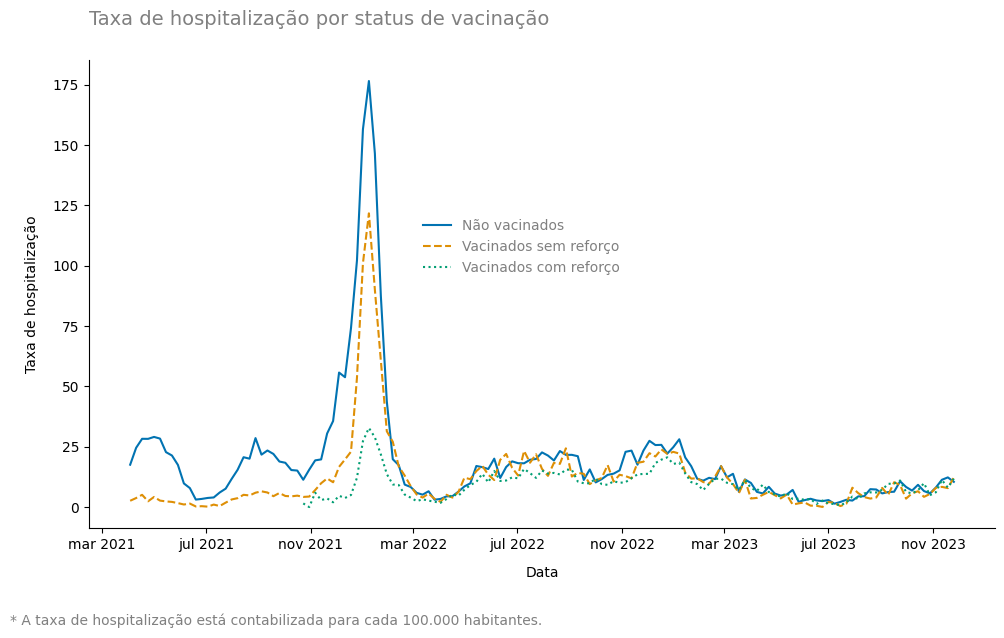

In [12]:
# Configurando a localidade para português (se necessário)
try:
    locale.setlocale(locale.LC_TIME, 'pt_BR.UTF-8')  # Linux/Mac
except:
    locale.setlocale(locale.LC_TIME, 'Portuguese_Brazil')  # Possível para Windows

# Definindo a paleta colorblind do Seaborn
sns.set_palette("colorblind")

plt.figure(figsize=(10, 6))

sns.lineplot(x=df_hospitalizacoes['Week End'], y=df_hospitalizacoes['Unvaccinated Rate'], label='Não vacinados', errorbar=None, linestyle='-')
sns.lineplot(x=df_hospitalizacoes['Week End'], y=df_hospitalizacoes['Vaccinated Rate'], label='Vacinados sem reforço', errorbar=None, linestyle='--')
sns.lineplot(x=df_hospitalizacoes['Week End'], y=df_hospitalizacoes['Boosted Rate'], label='Vacinados com reforço', errorbar=None, linestyle=':')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.title('Taxa de hospitalização por status de vacinação', loc='left', pad=25, color='gray', fontsize=14)
plt.xlabel('Data', labelpad=10)
plt.ylabel('Taxa de hospitalização', labelpad=10)
plt.legend(loc='right', frameon=False, bbox_to_anchor=(0.6, 0.6), labelcolor='gray')

# Configurando o eixo X para mudar o formato das datas
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=4))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks()
plt.tight_layout()

plt.figtext(0, -0.05, "* A taxa de hospitalização está contabilizada para cada 100.000 habitantes.", ha="left", fontsize=10, color="gray")

plt.savefig('hospitalizacao-status-vacinacao.png', dpi = 1200)
plt.show()

### Investigação da relação entre a taxa de hospitalização e o status de vacinação ao longo do tempo

Vamos realizar o cálculo da média, mediana e desvio padrão para a taxa de hospitalização para cada status de vacinação.

In [13]:
resumo_estatisticas_hosp = df_hospitalizacoes[['Unvaccinated Rate','Vaccinated Rate','Boosted Rate']].describe().loc[['mean', 'std']]
resumo_estatisticas_hosp

,Unvaccinated Rate,Vaccinated Rate,Boosted Rate
mean,19.190568,12.160595,9.31210
std,40.570633,35.264944,16.21269


In [14]:
# extraindo os valores da média para cada status de vacinação
media_hosp = resumo_estatisticas_hosp.iloc[0].values

# extraindo os valores do desvio padrão para cada status de vacinação
desv_pad_hosp = resumo_estatisticas_hosp.iloc[1].values

In [15]:
# nomes das colunas
colunas_status_vac = ['Não vacinados', 'Vacinados sem reforço', 'Vacinados com reforço']

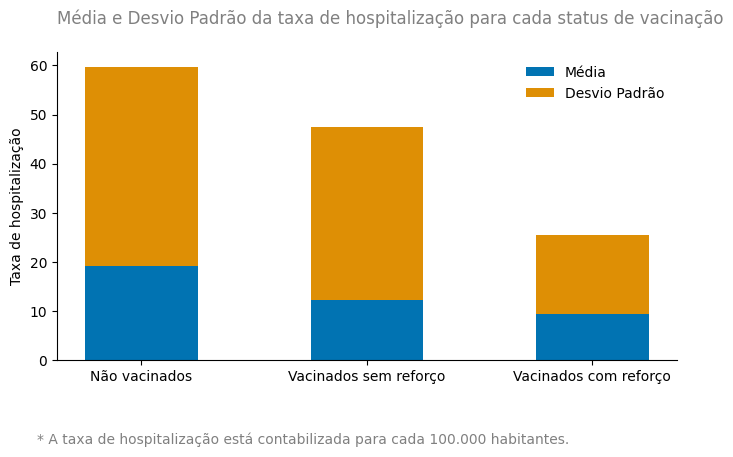

In [16]:
plt.figure(figsize=(8,4))

cores = sns.color_palette("colorblind")[:2]  # extraindo duas cores da paleta

plt.bar(x=colunas_status_vac, height=media_hosp, color=cores[0], label='Média', width=0.5)
plt.bar(x=colunas_status_vac, height=desv_pad_hosp, bottom=media_hosp, color=cores[1], label='Desvio Padrão', width=0.5)
plt.title('Média e Desvio Padrão da taxa de hospitalização para cada status de vacinação', loc='left', color='gray', pad=20)
plt.ylabel('Taxa de hospitalização')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.figtext(0.1, -0.1, '* A taxa de hospitalização está contabilizada para cada 100.000 habitantes.', color='gray')

plt.legend(loc='right', frameon=False, bbox_to_anchor=(1, 0.9))

plt.savefig('grafico-estatisticas-taxa-hosp.png', dpi=1200)
plt.show()

Esse resumo estatístico indica que manter o ciclo vacinal completo diminui a taxa média de hospitalizações. Além disso, a diminuição no desvio padrão conforme aumenta-se o número de vacinas tomadas indica menor variabilidade nos dados, sendo um indício de que as taxas de hospitalização entre os indivíduos vacinados são consistentes e homogêneas. Isso significa também que, em geral, a maioria das pessoas com o reforço apresenta taxas de hospitalização próximas à média, com menos casos extremos (altos ou baixos).

Vamos construir boxplots para visualizar a distribuição das taxas de hospitalização entre os grupos

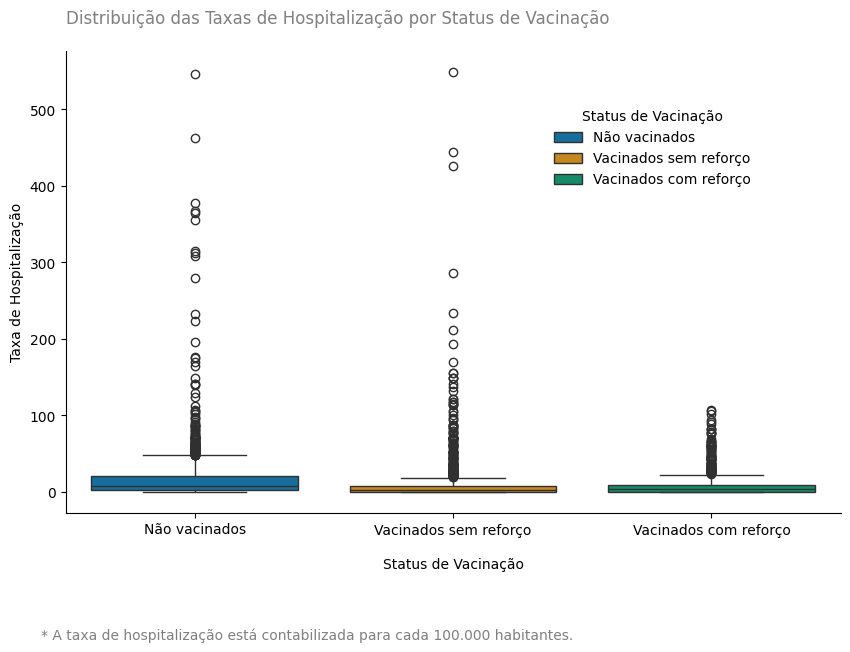

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_hospitalizacoes[['Unvaccinated Rate', 'Vaccinated Rate', 'Boosted Rate']])
plt.xticks(ticks=[0, 1, 2], labels=['Não vacinados', 'Vacinados sem reforço', 'Vacinados com reforço'])
plt.title('Distribuição das Taxas de Hospitalização por Status de Vacinação', loc='left', color='gray', pad=20)
plt.ylabel('Taxa de Hospitalização')
plt.xlabel('Status de Vacinação', labelpad=15)
plt.legend(['Não vacinados', 'Vacinados sem reforço', 'Vacinados com reforço'], title="Status de Vacinação", bbox_to_anchor=(0.9, 0.9), frameon=False)
plt.figtext(0.1, -0.1, '* A taxa de hospitalização está contabilizada para cada 100.000 habitantes.', color='gray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

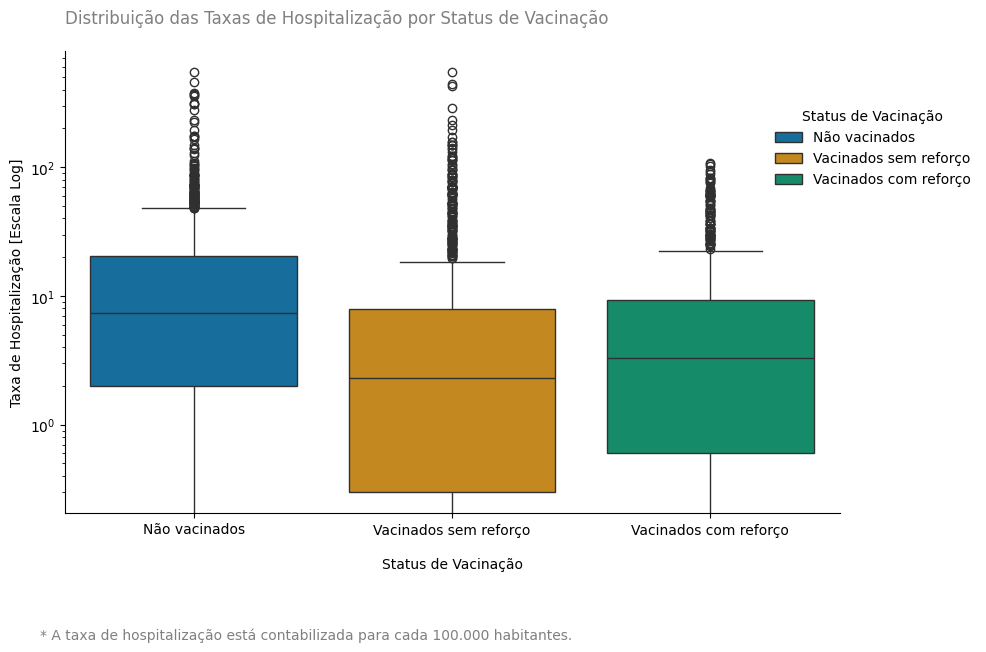

In [18]:
# Utilizando a escala log para visualizar melhor a caixa
plt.figure(figsize=(10,6))
sns.boxplot(data=df_hospitalizacoes[['Unvaccinated Rate', 'Vaccinated Rate', 'Boosted Rate']])
plt.yscale('log')  # Define a escala do eixo y como logarítmica
plt.xticks(ticks=[0, 1, 2], labels=['Não vacinados', 'Vacinados sem reforço', 'Vacinados com reforço'])
plt.title('Distribuição das Taxas de Hospitalização por Status de Vacinação', loc='left', color='gray', pad=20)
plt.ylabel('Taxa de Hospitalização [Escala Log]')
plt.xlabel('Status de Vacinação', labelpad=15)
plt.legend(['Não vacinados', 'Vacinados sem reforço', 'Vacinados com reforço'], title="Status de Vacinação", bbox_to_anchor=(0.9, 0.9), frameon=False)
plt.figtext(0.1, -0.1, '* A taxa de hospitalização está contabilizada para cada 100.000 habitantes.', color='gray')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

A partir dos boxplots construídos, percebe-se que os dados para pessoas não vacinadas são muito mais dispersos, indicando um maior desvio padrão, assim como obtido no resumo estatístico construído anteriormente.

# Pergunta de negócio 2

A taxa de hospitalização entre os vacinados com reforço é consistentemente mais baixa do que entre os não vacinados?

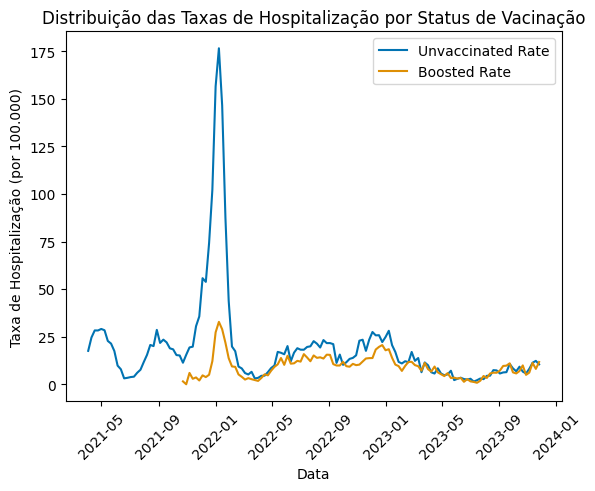

In [19]:
sns.lineplot(x=df_hospitalizacoes['Week End'], y=df_hospitalizacoes['Unvaccinated Rate'], label = 'Unvaccinated Rate', errorbar=None)
sns.lineplot(x=df_hospitalizacoes['Week End'], y=df_hospitalizacoes['Boosted Rate'], label = 'Boosted Rate', errorbar=None)
plt.title('Distribuição das Taxas de Hospitalização por Status de Vacinação')
plt.ylabel('Taxa de Hospitalização (por 100.000)')
plt.xlabel('Data')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [20]:
# Calculando as médias
mean_unvaccinated = df_hospitalizacoes['Unvaccinated Rate'].mean()
mean_boosted = df_hospitalizacoes['Boosted Rate'].mean()

In [21]:
print(f'Média Unvaccinated Rate: {mean_unvaccinated:.2f}')
print(f'Média Boosted Rate: {mean_boosted:.2f}')

Média Unvaccinated Rate: 19.19
Média Boosted Rate: 9.31


Para fazer a comparação entre a taxa de hospitalização entre pessoas não vacinadas e as vacinadas com reforço, vamos utilizar o conceito de diferença percentual, definida como:

\begin{equation}
    \Delta{\%} = \frac{V_{final} - V_{inicial}}{V_{inicial}}
\end{equation}

In [22]:
# Diferença percentual do valor médio da taxa de hospitalização entre os não vacinados e os vacinados com reforço
if mean_unvaccinated != 0:  # Prevenir divisão por zero
    reduction_boosted = (mean_unvaccinated - mean_boosted) / mean_unvaccinated * 100
    print(f'Redução de hospitalização entre vacinados com reforço: {reduction_boosted:.2f}%')
else:
    print("Não é possível calcular a redução para a taxa de não vacinados, pois a média é zero.")

Redução de hospitalização entre vacinados com reforço: 51.48%


A partir das análises que fizemos até agora, a taxa de hospitalização entre os vacinados com reforço é consistentemente mais baixa. Entretanto, é válido realizar testes estatísticos e verificar se a diferença se mantém ao longo do tempo e em várias circunstâncias (por exemplo, em diferentes faixas etárias, durante surtos ou variantes específicas do vírus). Isso será feito em análises futuras.

# Pergunta de negócio 3

Como a taxa de mortalidade varia entre diferentes grupos de vacinação (não vacinados, vacinados, vacinados com reforço)?

In [23]:
df_p03 = df[df['Outcome'] == 'Deaths'][['Week End', 'Outcome', 'Unvaccinated Rate', 'Vaccinated Rate', 'Boosted Rate', 'Age Group']]
df_p03.head()

,Week End,Outcome,Unvaccinated Rate,Vaccinated Rate,Boosted Rate,Age Group
0,07/09/2022,Deaths,0.0,NaN,NaN,0-4
6,07/23/2022,Deaths,0.0,0.0,NaN,0-4
7,07/16/2022,Deaths,0.0,NaN,NaN,0-4
9,07/02/2022,Deaths,0.0,NaN,NaN,0-4
11,10/01/2022,Deaths,0.3,0.1,0.9,All


In [24]:
# o dataframe original está no formato dia/mes/ano
df_p03['Week End'] = pd.to_datetime(df_p03['Week End'], format='%m/%d/%Y')

In [25]:
df_p03.dtypes

Week End             datetime64[ns]
Outcome                      object
Unvaccinated Rate           float64
Vaccinated Rate             float64
Boosted Rate                float64
Age Group                    object
dtype: object

In [26]:
df.columns

Index(['Outcome', 'Week End', 'Age Group', 'Unvaccinated Rate',
       'Vaccinated Rate', 'Boosted Rate', 'Crude Vaccinated Ratio',
       'Crude Boosted Ratio', 'Age-Adjusted Unvaccinated Rate',
       'Age-Adjusted Vaccinated Rate', 'Age-Adjusted Boosted Rate',
       'Age-Adjusted Vaccinated Ratio', 'Age-Adjusted Boosted Ratio',
       'Population Unvaccinated', 'Population Vaccinated',
       'Population Boosted', 'Outcome Unvaccinated', 'Outcome Vaccinated',
       'Outcome Boosted', 'Age Group Min', 'Age Group Max'],
      dtype='object')

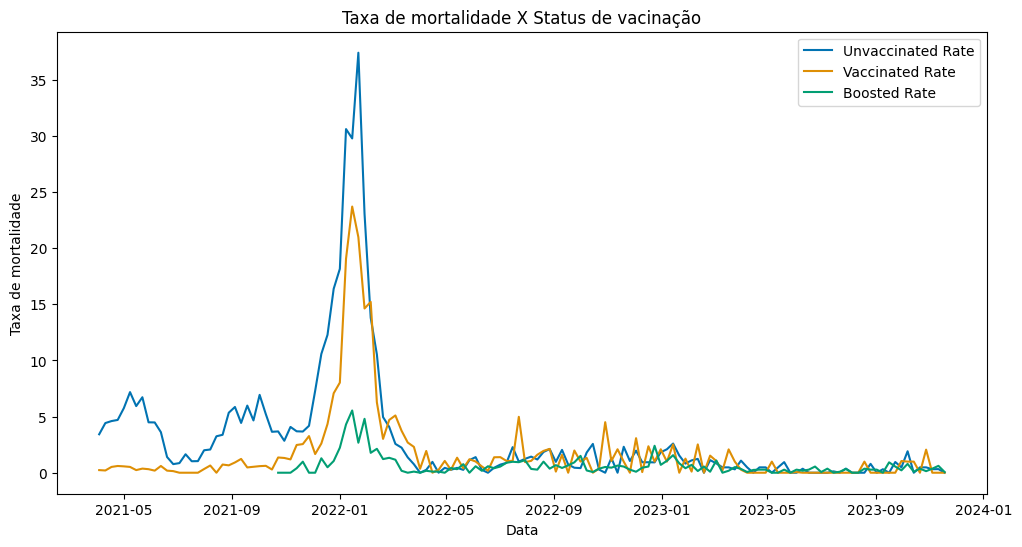

In [27]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_p03, x='Week End', y='Unvaccinated Rate', errorbar=None, label='Unvaccinated Rate')
sns.lineplot(data=df_p03, x='Week End', y='Vaccinated Rate', errorbar=None, label='Vaccinated Rate')
sns.lineplot(data=df_p03, x='Week End', y='Boosted Rate', errorbar=None, label='Boosted Rate')
plt.xlabel('Data')
plt.ylabel('Taxa de mortalidade')
plt.title('Taxa de mortalidade X Status de vacinação')
plt.legend()
plt.show()

Visualmente vemos que a taxa de mortalidade entre os vacinados com reforço é mais baixa do que para os outros dois grupos, principalmente próximo da data 2022-02. De forma geral, a taxa de mortalidade parece se manter menor durante todo o período entre os vacinados com reforço, mas análises mais detalhadas precisam ser feitas.

In [28]:
# Calculando as médias da taxa de mortalidade
mean_unvaccinated_p03 = df_p03['Unvaccinated Rate'].mean()
mean_vaccinated_p03 = df_p03['Vaccinated Rate'].mean()
mean_boosted_p03 = df_p03['Boosted Rate'].mean()

In [29]:
print(f'Média da taxa de mortalidade para Unvaccinated Rate: {mean_unvaccinated_p03:.2f}')
print(f'Média da taxa de mortalidade para Vaccinated Rate: {mean_vaccinated_p03:.2f}')
print(f'Média da taxa de mortalidade para Boosted Rate: {mean_boosted_p03:.2f}')

Média da taxa de mortalidade para Unvaccinated Rate: 3.08
Média da taxa de mortalidade para Vaccinated Rate: 1.72
Média da taxa de mortalidade para Boosted Rate: 0.62


In [30]:
# Calculando os máximos da taxa de mortalidade
max_unvaccinated_p03 = df_p03['Unvaccinated Rate'].max()
max_vaccinated_p03 = df_p03['Vaccinated Rate'].max()
max_boosted_p03 = df_p03['Boosted Rate'].max()

In [31]:
print(f'Máxima taxa de mortalidade para Unvaccinated Rate: {max_unvaccinated_p03:.2f}')
print(f'Máxima taxa de mortalidade para Vaccinated Rate: {max_vaccinated_p03:.2f}')
print(f'Máxima taxa de mortalidade para Boosted Rate: {max_boosted_p03:.2f}')

Máxima taxa de mortalidade para Unvaccinated Rate: 199.50
Máxima taxa de mortalidade para Vaccinated Rate: 158.40
Máxima taxa de mortalidade para Boosted Rate: 26.20


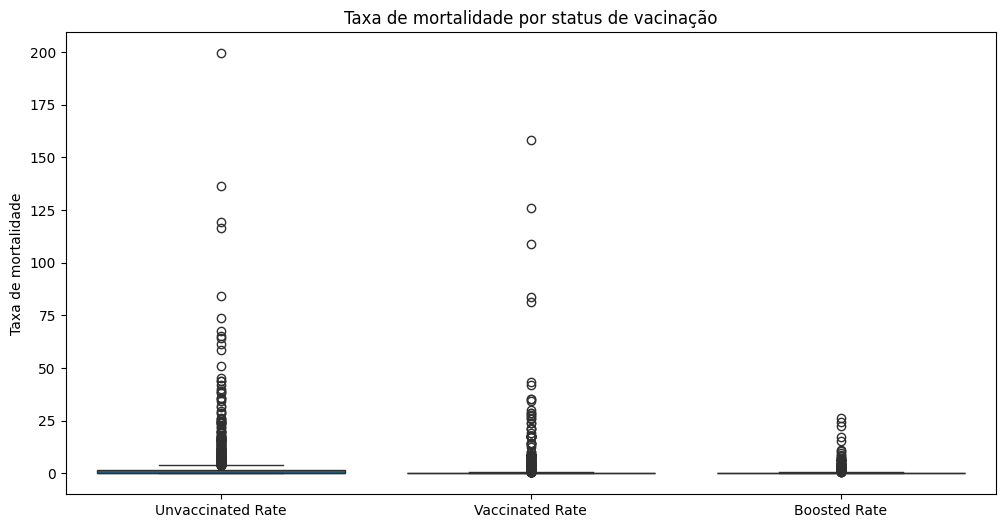

In [32]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_p03[['Unvaccinated Rate', 'Vaccinated Rate', 'Boosted Rate']])
plt.ylabel('Taxa de mortalidade')
# plt.yscale('log')
plt.title('Taxa de mortalidade por status de vacinação')
plt.show()

Apesar de as caixas do boxplot estarem quase invisíveis, é possível perceber que, conforme a pessoa toma mais vacinas, menor é a taxa máxima de mortalidade e menor o desvio padrão. A diminuição do desvio padrão indica menor variabilidade nos dados e que a taxa de mortalidade entre as pessoas com mais vacinas é mais próximas da média, possui menos outliers (casos extremos) --> Não há casos atípicos que possam influenciar a média.

# Pergunta de negócio 4

Como a taxa de mortalidade varia por faixa etária?

In [33]:
df_p03.head()

,Week End,Outcome,Unvaccinated Rate,Vaccinated Rate,Boosted Rate,Age Group
0,2022-07-09,Deaths,0.0,NaN,NaN,0-4
6,2022-07-23,Deaths,0.0,0.0,NaN,0-4
7,2022-07-16,Deaths,0.0,NaN,NaN,0-4
9,2022-07-02,Deaths,0.0,NaN,NaN,0-4
11,2022-10-01,Deaths,0.3,0.1,0.9,All


C:\Users\olive\AppData\Local\Temp\ipykernel_14192\2547677965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_p03_filtrado['Age Group'] = pd.Categorical(df_p03_filtrado['Age Group'], categories=ordem_idade, ordered=True)
C:\Users\olive\AppData\Local\Temp\ipykernel_14192\2547677965.py:11: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  sns.lineplot(data=df_p03_filtrado, x='Week End', y='Unvaccinated Rate', hue='Age Group', hue_order=ordem_idade, palette=sns.color_palette("colorblind"))


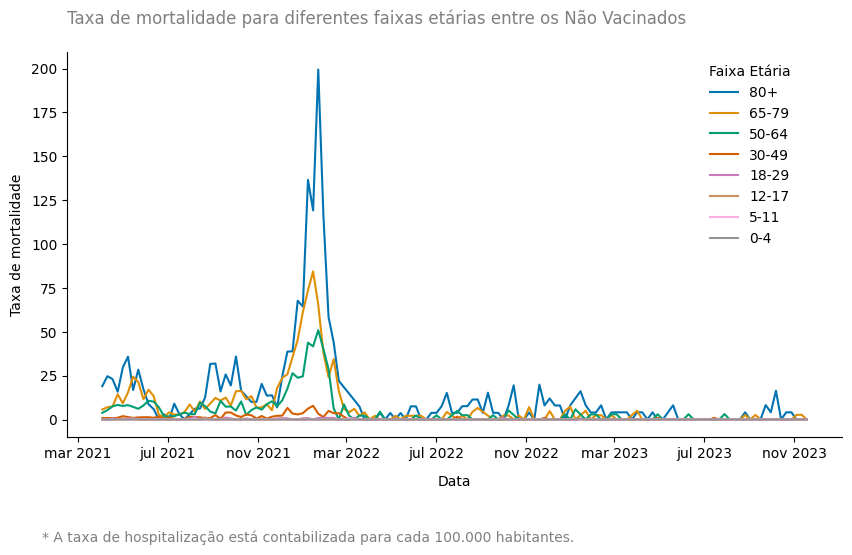

In [34]:
# Gráfico da taxa de mortalidade para diferentes faixas etárias entre os Não Vacinados

# Removendo "All" e ordenando os grupos etários de forma decrescente
df_p03_filtrado = df_p03[df_p03['Age Group'] != 'All']
ordem_idade = ['80+', '65-79', '50-64', '30-49', '18-29', '12-17', '5-11', '0-4']
df_p03_filtrado['Age Group'] = pd.Categorical(df_p03_filtrado['Age Group'], categories=ordem_idade, ordered=True)

plt.figure(figsize=(10, 5))

# Criando o gráfico com paleta acessível
sns.lineplot(data=df_p03_filtrado, x='Week End', y='Unvaccinated Rate', hue='Age Group', hue_order=ordem_idade, palette=sns.color_palette("colorblind"))

# Ajustando título e rótulos
plt.title('Taxa de mortalidade para diferentes faixas etárias entre os Não Vacinados', loc='left', color='gray', pad=20)
plt.xlabel('Data', labelpad=10)
plt.ylabel('Taxa de mortalidade', labelpad=5)

# Configurando o eixo X para formatar datas corretamente
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=4))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Adicionando observação
plt.figtext(0.1, -0.1, '* A taxa de hospitalização está contabilizada para cada 100.000 habitantes.', color='gray')

# Removendo bordas superiores e direitas
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ajustando legenda (ordenada corretamente e sem borda)
plt.legend(title="Faixa Etária", frameon=False, bbox_to_anchor=(0.95, 1))
plt.savefig('faixa-etaria-nao-vacinados.png', dpi=1200)
plt.show()

A partir do gráfico acima, vemos que a taxa de mortalidade para idades 80+ é maior do que para todos os outros grupos de idade ao longo de todo o tempo. Vamos verificar se esse mesmo padrão se repete para diferentes status de vacinação.

C:\Users\olive\AppData\Local\Temp\ipykernel_14192\3714324657.py:6: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  sns.lineplot(data=df_p03_filtrado, x='Week End', y='Vaccinated Rate', hue='Age Group', hue_order=ordem_idade, palette=sns.color_palette("colorblind"))


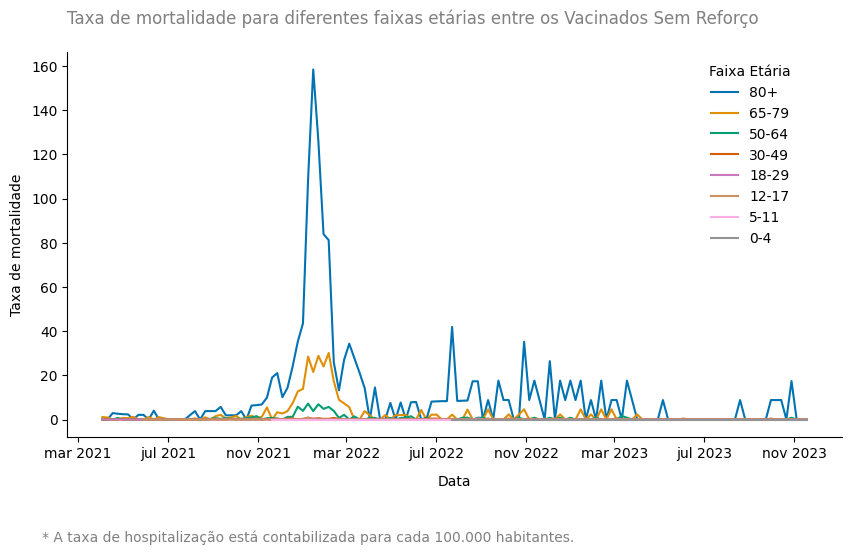

In [35]:
# Gráfico da taxa de mortalidade para diferentes faixas etárias entre os Vacinados Sem Reforço

plt.figure(figsize=(10, 5))

# Criando o gráfico com paleta acessível
sns.lineplot(data=df_p03_filtrado, x='Week End', y='Vaccinated Rate', hue='Age Group', hue_order=ordem_idade, palette=sns.color_palette("colorblind"))

# Ajustando título e rótulos
plt.title('Taxa de mortalidade para diferentes faixas etárias entre os Vacinados Sem Reforço', loc='left', color='gray', pad=20)
plt.xlabel('Data', labelpad=10)
plt.ylabel('Taxa de mortalidade', labelpad=5)

# Configurando o eixo X para formatar datas corretamente
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=4))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Adicionando observação
plt.figtext(0.1, -0.1, '* A taxa de hospitalização está contabilizada para cada 100.000 habitantes.', color='gray')

# Removendo bordas superiores e direitas
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ajustando legenda (ordenada corretamente e sem borda)
plt.legend(title="Faixa Etária", frameon=False, bbox_to_anchor=(0.95, 1))
plt.savefig('faixa-etaria-vacinados-sem-reforco.png', dpi=1200)
plt.show()

C:\Users\olive\AppData\Local\Temp\ipykernel_14192\552052883.py:6: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  sns.lineplot(data=df_p03_filtrado, x='Week End', y='Boosted Rate', hue='Age Group', hue_order=ordem_idade, palette=sns.color_palette("colorblind"))


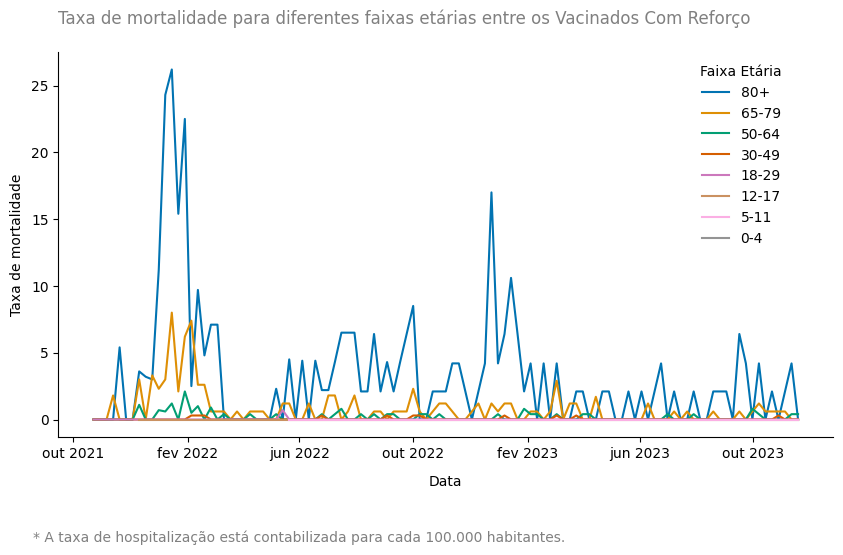

In [36]:
# Gráfico da taxa de mortalidade para diferentes faixas etárias entre os Vacinados Com Reforço

plt.figure(figsize=(10, 5))

# Criando o gráfico com paleta acessível
sns.lineplot(data=df_p03_filtrado, x='Week End', y='Boosted Rate', hue='Age Group', hue_order=ordem_idade, palette=sns.color_palette("colorblind"))

# Ajustando título e rótulos
plt.title('Taxa de mortalidade para diferentes faixas etárias entre os Vacinados Com Reforço', loc='left', color='gray', pad=20)
plt.xlabel('Data', labelpad=10)
plt.ylabel('Taxa de mortalidade', labelpad=5)

# Configurando o eixo X para formatar datas corretamente
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=4))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Adicionando observação
plt.figtext(0.1, -0.1, '* A taxa de hospitalização está contabilizada para cada 100.000 habitantes.', color='gray')

# Removendo bordas superiores e direitas
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ajustando legenda (ordenada corretamente e sem borda)
plt.legend(title="Faixa Etária", frameon=False, bbox_to_anchor=(0.95, 1))
plt.savefig('faixa-etaria-vacinados-com-reforco.png', dpi=1200)
plt.show()

Pelos dois últimos gráficos acima, vemos que o padrão se repete: pessoas 80+ possuem maiores taxas de mortalidade.

Vamos calcular a média da taxa de mortalidade para cada grupo de idade.

In [37]:
df_p03[['Unvaccinated Rate', 'Vaccinated Rate', 'Boosted Rate', 'Age Group']].head()

,Unvaccinated Rate,Vaccinated Rate,Boosted Rate,Age Group
0,0.0,NaN,NaN,0-4
6,0.0,0.0,NaN,0-4
7,0.0,NaN,NaN,0-4
9,0.0,NaN,NaN,0-4
11,0.3,0.1,0.9,All


In [38]:
lista_idades = list(df_p03['Age Group'].unique())
lista_idades

['0-4', 'All', '80+', '50-64', '5-11', '18-29', '30-49', '12-17', '65-79']

In [39]:
lista_status = ['Unvaccinated Rate', 'Vaccinated Rate',	'Boosted Rate']

In [40]:
for status in lista_status:
    for idade in lista_idades:
        media_mortalidade = df_p03.loc[df_p03["Age Group"] == idade, status].mean()
        print(f'Média da taxa de mortalidade para {status} no grupo {idade}: {media_mortalidade}')
    print()

Média da taxa de mortalidade para Unvaccinated Rate no grupo 0-4: 0.004347826086956522
Média da taxa de mortalidade para Unvaccinated Rate no grupo All: 1.5072463768115942
Média da taxa de mortalidade para Unvaccinated Rate no grupo 80+: 13.57536231884058
Média da taxa de mortalidade para Unvaccinated Rate no grupo 50-64: 4.46231884057971
Média da taxa de mortalidade para Unvaccinated Rate no grupo 5-11: 0.010144927536231883
Média da taxa de mortalidade para Unvaccinated Rate no grupo 18-29: 0.11884057971014492
Média da taxa de mortalidade para Unvaccinated Rate no grupo 30-49: 0.7586956521739131
Média da taxa de mortalidade para Unvaccinated Rate no grupo 12-17: 0.018115942028985508
Média da taxa de mortalidade para Unvaccinated Rate no grupo 65-79: 7.266666666666667

Média da taxa de mortalidade para Vaccinated Rate no grupo 0-4: 0.0
Média da taxa de mortalidade para Vaccinated Rate no grupo All: 0.463768115942029
Média da taxa de mortalidade para Vaccinated Rate no grupo 80+: 10.815